Building a model to forecast S1, as a function of S1, S2, …, S10

​First 50 rows of the dataset have values of S1. The remaining 50 rows of the dataset have values for S1
missing: our model will fill these in.

(1) Which variables matter for predicting S1?

Variables having Pearson's correlation coefficient >0.8 or <-0.8 with S1 are (in decreasing order): S6, S5, S9, S3, S2, S4 

S10 and S8 don't fall under the above mentioned pearson R range.

Thus, they matter for predicting S1.


(2) Does S1 go up or down cumulatively (on an open­to­close basis) over this period?
Up by 5.91


(3) How much confidence do you have in your model? Why and when would it fail?


(4) What techniques did you use? Why?

- For determinig variables that matter for predicting S1, we calculate Pearson's correlation coefficient, because it helps determine measure of the degree of linear dependence between two variables.

- For modelling, we use OLS on Multiple Linear Regression, because:

a. We predict output for test data, based on the training data. So it's a supervised learning problem, 
b. The output variable to be predicted is on a continuous scale, so we employ regression.
c. There are multiple significant dependent variables, so we apply mutiple linear regression.
d. There's a high correlation between regressors (as seen in the regressors' correlation matrix)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import regression
from scipy.stats.stats import pearsonr
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model

Reading into Pandas Dataframe, and splitting into traning and test datasets.

In [2]:
data_file = '<file_location>.csv'
data = pd.read_csv(data_file)
data = data[0:101]

trainingData = data[0:50]
testData = data[51:100]
trainingData.columns

Index(['date', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10'], dtype='object')

In [3]:
del testData['date']
del testData['S1']

testData.columns

Index(['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10'], dtype='object')

Finding if S1 goes up/down cumulatively

5.917590623

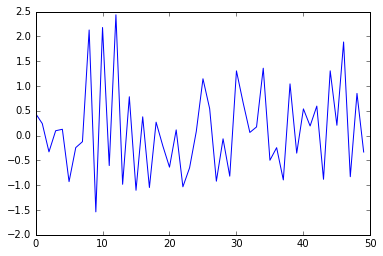

In [4]:
%matplotlib inline
plt.plot(data.S1)

cumulativeChangeS1 = trainingData.S1
cumulativeChangeS1.sum(axis=0)


In [5]:
del trainingData['date']
trainingData.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,0.446531,-0.828505,1.268874,1.468834,1.207883,0.622798,1.821350,-0.699674,1.890508,0.523177
1,0.242901,-0.245839,-0.558069,-0.990142,-0.497502,-0.137380,0.158878,0.081083,-1.311177,0.175995
2,-0.327468,-0.745564,0.254992,0.322715,0.832613,0.091484,-0.405513,-0.323873,0.920877,-0.066132
3,0.098084,-0.636639,-0.840802,0.643013,0.167639,0.017852,0.293241,0.871516,0.201038,-0.166004
4,0.127334,-0.710122,1.396653,0.135177,1.888105,0.583958,0.949694,0.428746,1.050444,1.196328


In [6]:
# Correlation b/w S1 and all independent variables

for column in trainingData:
    print(pearsonr(trainingData['S1'], trainingData[column]))


(1.0, 0.0)
(-0.8962857569999102, 1.4266630142577519e-18)
(0.91506717355730838, 1.4660979070085499e-20)
(0.84521856407540552, 1.1670259865512026e-14)
(0.93490583999648036, 3.1037828729566309e-23)
(0.93833586996302587, 8.8025226585623124e-24)
(0.92035698614775152, 3.3285728489004498e-21)
(0.62701649245246005, 1.1045880231158655e-06)
(0.91994415498738091, 3.7505205198267953e-21)
(-0.63589677779857878, 6.9695351115388734e-07)


Building correlation matrix for regressors to understand type of regression to employ

In [7]:
correlMat = np.corrcoef([trainingData.S2, trainingData.S3, trainingData.S4, trainingData.S5, 
                         trainingData.S6, trainingData.S7, trainingData.S8, trainingData.S9, trainingData.S10])
correlMat

array([[ 1.        , -0.8797982 , -0.84822979, -0.90822847, -0.91675221,
        -0.89251025, -0.74134782, -0.90111378,  0.68085586],
       [-0.8797982 ,  1.        ,  0.84101048,  0.94586921,  0.95303934,
         0.91850052,  0.65627119,  0.93323391, -0.66327554],
       [-0.84822979,  0.84101048,  1.        ,  0.89658221,  0.90029131,
         0.88016055,  0.60856863,  0.91009935, -0.60642926],
       [-0.90822847,  0.94586921,  0.89658221,  1.        ,  0.98836492,
         0.9611219 ,  0.6883806 ,  0.96514291, -0.67342398],
       [-0.91675221,  0.95303934,  0.90029131,  0.98836492,  1.        ,
         0.965351  ,  0.70244827,  0.9729268 , -0.68649803],
       [-0.89251025,  0.91850052,  0.88016055,  0.9611219 ,  0.965351  ,
         1.        ,  0.72518991,  0.93824226, -0.64133902],
       [-0.74134782,  0.65627119,  0.60856863,  0.6883806 ,  0.70244827,
         0.72518991,  1.        ,  0.63757423, -0.56530286],
       [-0.90111378,  0.93323391,  0.91009935,  0.96514291,  0

Splitting data for modeling

In [8]:
x_train = trainingData.ix[:,1:10]
y_train = trainingData.ix[:,0]
x_test = testData

Building Multivariate Regression Model

Ridge Regression

In [10]:
#Fit the model

ridgereg = linear_model.Ridge(alpha=0.1,normalize=True)
ridgereg.fit(x_train, y_train)
y_pred = ridgereg.predict(x_test)

# Writing results to CSV
ridgePredictedDF = pd.DataFrame(y_pred)

ridgePredictedDF.to_csv('stocksOutput_RR.csv')

Ordinary Least Squares (just for fun)

In [11]:
linear = linear_model.LinearRegression()

# Train the model using the training sets and check score
linear.fit(x_train, y_train)
linear.score(x_train, y_train)

#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

#Predict Output
predicted = linear.predict(x_test)

# Writing results to CSV
predictedDF = pd.DataFrame(predicted)

predictedDF.to_csv('stocksOutput_OLS.csv')

Coefficient: 
 [-0.26825825  0.08751967 -0.0434048   0.05465993  0.26645864  0.12473731
 -0.20930514 -0.01694478  0.02030703]
Intercept: 
 -0.0686183630572


In [12]:
# Validation scores

print("Cross-validation scores for Ridge Regression:\n")
for i in range (2,49):
    scores = cross_val_score(ridgereg, x_train, y_train, cv=i, scoring='r2')
    print("folds:",i,scores.mean())

    
print("\n\nCross-validation scores for Linear Regression:\n")  
for i in range (2,49):
    scores = cross_val_score(linear, x_train, y_train, cv=i, scoring='r2')
    print("folds:",i,scores.mean())
    

Cross-validation scores for Ridge Regression:

folds: 2 0.842619300809
folds: 3 0.867327491968
folds: 4 0.849699704329
folds: 5 0.854742492832
folds: 6 0.836738807813
folds: 7 0.70838769558
folds: 8 0.745760073731
folds: 9 0.738291630571
folds: 10 0.539122501128
folds: 11 0.565607030236
folds: 12 0.584280087206
folds: 13 0.592270860833
folds: 14 0.435006015387
folds: 15 0.463290582032
folds: 16 0.491676953988
folds: 17 0.558192033526
folds: 18 0.576937528873
folds: 19 0.263938326709
folds: 20 0.137348814204
folds: 21 0.176861041343
folds: 22 0.128989604421
folds: 23 0.164775505981
folds: 24 -1.21644770121
folds: 25 -1.87761789925
folds: 26 -1.80838273689
folds: 27 -1.77747864775
folds: 28 -1.7483572727
folds: 29 -1.71804603996
folds: 30 -1.50528005248
folds: 31 -1.4763030089
folds: 32 -1.38861290193
folds: 33 -1.368231138
folds: 34 -1.2659543121
folds: 35 -1.25169509785
folds: 36 -1.22842602113
folds: 37 -1.21827902152
folds: 38 -1.20729577022
folds: 39 -1.16436773117
folds: 40 -1.1592